In [1]:
import re
from lxml import etree # 파서
from nltk.tokenize import word_tokenize, sent_tokenize
path='C:/Users/student/Downloads/데이터들/word2vec자료/'

In [8]:
targetText=etree.parse(open(path+'ted_en-20160408.xml','r', encoding='utf-8'))

In [10]:
parseText='\n'.join(targetText.xpath('//content/text()'))
# content 태그 내부의 내용을 추출

In [12]:
parseText[:100]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo m"

In [26]:
contentText=re.sub('\([^)]*\)',' ',parseText)
# (글들) -> 제거

In [27]:
sentText=sent_tokenize(contentText) # 문장 단위로 토큰화

In [28]:
# 대문자 => 소문자, 구두점제거(영문, 숫자 제외 전부 제거)
normalizedText=[]
for sent in sentText:
    tokens=re.sub("[^a-z0-9]+",' ',sent.lower())
    normalizedText.append(tokens)
    
result=[word_tokenize(s) for s in normalizedText]

In [29]:
len(result)

273424

In [30]:
for i in result[:5]:
    print(i)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']
['consider', 'facit']
['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them']


In [31]:
from gensim.models import Word2Vec

C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
model=Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
# 임베딩 벡터 차원 일반적으로 백단위 차원
# 윈도우 크기
# 최소 등장 회수
# workers=4 => quad 코어
# sg : skip gram(1), cbow(0) => sg=0 했으니 cbow로 함

In [37]:
model.wv.most_similar("boy")

[('girl', 0.9330170154571533),
 ('kid', 0.8445499539375305),
 ('lady', 0.8231037855148315),
 ('woman', 0.8056600093841553),
 ('man', 0.7820838689804077),
 ('mary', 0.735873281955719),
 ('baby', 0.7320647239685059),
 ('guy', 0.7182575464248657),
 ('sister', 0.7175599932670593),
 ('friend', 0.6929576396942139)]

In [38]:
model.wv.wv.most_similar(positive=['computer'], topn=20)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('machine', 0.7676980495452881),
 ('software', 0.7408844232559204),
 ('robot', 0.688532829284668),
 ('device', 0.6665855646133423),
 ('3d', 0.6555460691452026),
 ('camera', 0.6470375061035156),
 ('printer', 0.6458841562271118),
 ('interface', 0.6371471881866455),
 ('simulation', 0.6362617015838623),
 ('satellite', 0.6357779502868652),
 ('video', 0.6273998022079468),
 ('keyboard', 0.6248003840446472),
 ('desktop', 0.6188421249389648),
 ('program', 0.6153753399848938),
 ('chip', 0.6106834411621094),
 ('code', 0.5894558429718018),
 ('algorithm', 0.5863164663314819),
 ('mechanical', 0.5821598768234253),
 ('lab', 0.5688421726226807),
 ('memory', 0.5663788318634033)]

In [40]:
model.wv.wv.most_similar(negative=['boy'], topn=20)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('diversity', 0.4648892283439636),
 ('processes', 0.446608304977417),
 ('biological', 0.44626671075820923),
 ('technological', 0.43317052721977234),
 ('financial', 0.43172210454940796),
 ('changes', 0.4274742901325226),
 ('environmental', 0.4255724251270294),
 ('natural', 0.4235394597053528),
 ('genetic', 0.4175596833229065),
 ('adapt', 0.4169822931289673),
 ('climate', 0.41651734709739685),
 ('complexity', 0.4108872413635254),
 ('benefits', 0.4099644422531128),
 ('vast', 0.40772420167922974),
 ('behavioral', 0.40652531385421753),
 ('testing', 0.404981404542923),
 ('systems', 0.40414926409721375),
 ('processing', 0.4041379392147064),
 ('incentives', 0.4008843004703522),
 ('existing', 0.40040823817253113)]

In [58]:
import pandas as pd
trainData=pd.read_table(path+'ratings.txt')

In [59]:
trainData[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [60]:
len(trainData)

200000

In [61]:
trainData.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [62]:
trainData=trainData.dropna(how='any') # null 행 제거

In [63]:
trainData['document']=trainData['document'].str.replace('[^가-힣ㄱ-ㅎㅏ-ㅣ ]+','')

In [64]:
trainData[:20]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [65]:
stopwords=['하다','한','에','와','자','과','걍','잘','좀','는','의','가','이','은','들']

In [66]:
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [68]:
okt=Okt()
tokenizedData=[]
for sent in trainData['document']:
    t=okt.morphs(sent,  stem=True)
    # 어근 추출 => stem
    t=[w for w in t if not w in stopwords]
    tokenizedData.append(t)

74


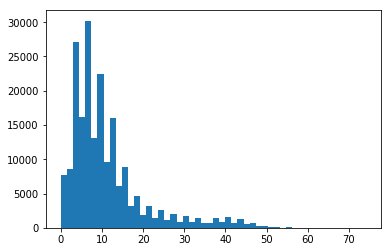

In [72]:
# tokenizedData에 저장된 리뷰에 대해, 
# 리뷰 최대 길이
# 리뷰 평균 길이
print(max(len(I) for I in tokenizedData) )
# stem : 어근, norm:그래욬ㅋㅋ=>그래요
sum(map(len, tokenizedData))/len(tokenizedData) # 약 11
plt.hist([len(s) for s in tokenizedData], bins=50)
plt.show()

In [77]:
model=Word2Vec(sentences=tokenizedData,
        size=100,
        window=5,
        min_count=5,
        workers=4,
        sg=0)

In [78]:
model.wv.vectors.shape

(16480, 100)

In [81]:
model.wv.most_similar("차승원")

[('송강호', 0.9014579057693481),
 ('김혜수', 0.8888330459594727),
 ('신하균', 0.8886997699737549),
 ('유해진', 0.8885878920555115),
 ('한석규', 0.8800506591796875),
 ('신현준', 0.8722391128540039),
 ('엄정화', 0.8658445477485657),
 ('황정민', 0.865084171295166),
 ('디카프리오', 0.8648921847343445),
 ('조인성', 0.8647530674934387)]

In [82]:
# 구글 word2vec 모델 : 3백만개 단어벡터

In [86]:
from gensim.models import Word2Vec
import gensim
model=gensim.models.Word2Vec.load(path+"ko.bin")

In [88]:
model

In [92]:
model.wv.most_similar("아저씨")
model.wv.most_similar("구매")
model.wv.most_similar("추천")

[('위촉', 0.6401861310005188),
 ('천거', 0.6389721632003784),
 ('추대', 0.5849215388298035),
 ('선출', 0.5803494453430176),
 ('초청', 0.5759262442588806),
 ('발탁', 0.5613523721694946),
 ('선정', 0.5511638522148132),
 ('임명', 0.5414161682128906),
 ('초빙', 0.5363222360610962),
 ('기용', 0.5326868295669556)]